In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Classification</center></h1>

A process for predicting <b>qualitative</b> or <b>categorical</b> variables is called as <b>Classification</b>.

### 4.1 An Overview of Classification 

The dataset used in this chapter will be <b>Default</b> dataset. We will predict that whether an individual will default on his/her credit card payment on the basis of annual income and monthly credit card balance. The data is displayed below:

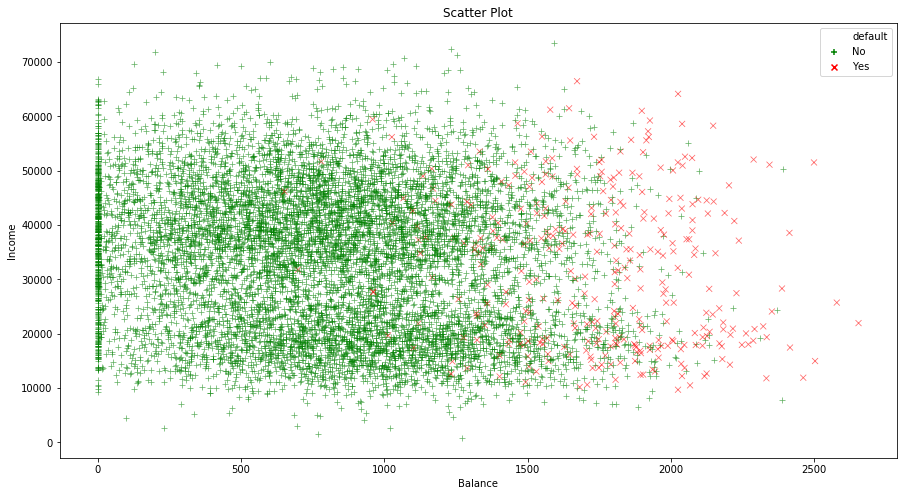

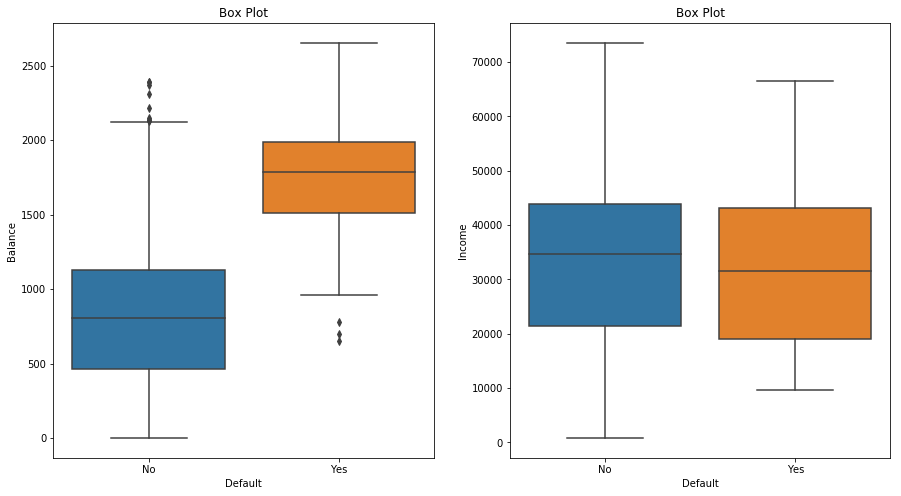

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

default = pd.read_excel("data/Default.xlsx")

markers = {"Yes": "x", "No": "+"}
palette = {"Yes": "red", "No": "green"}
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.scatterplot(x="balance", y="income", hue="default", style="default", markers=markers, palette=palette,
                alpha=0.6, data=default)
ax.set_xlabel('Balance')
ax.set_ylabel('Income')
ax.set_title('Scatter Plot')

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(121)
sns.boxplot(x="default", y="balance", data=default)
ax.set_xlabel('Default')
ax.set_ylabel('Balance')
ax.set_title('Box Plot')

ax = fig.add_subplot(122)
sns.boxplot(x="default", y="income", data=default)
ax.set_xlabel('Default')
ax.set_ylabel('Income')
ax.set_title('Box Plot')


plt.show()

### 4.2 Why Not Linear Regression?

In general, there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression. For the binary qualitative response, we can simply encode the variables as 0 and 1 and predict the values taking 0.5 as threshold.

### 4.3 Logistic Regression

Rather than modeling the response directly, <b>logistic regression</b> models the probability that response $Y$ belongs to a particular category. For the Default data, logistic regression models the probability of default. The probability of default given balance can be written as $Pr \ (default=Yes \ | \ balance)$, and can be abbreviated as $p(balance)$. We can choose a threshold and then predict <b>default</b> as Yes if $p(balance) > 0.5$. If we want to be more conservative, we can lower the threshold.

#### 4.3.1 The Logistic Model 

The problem with using linear regression to predict a qualitative variable is that any time a straight line is fit to a binary response that is coded as 0 and 1, in principle we can always predict $p(X) < 0$ and $p(X) > 1$ for some values of X. To avoid this problem, we can use a function instead that gives output between 0 and 1 for all values of X. In logistic regression we use <b>logistic function</b>, which is given as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

and to fit the model, we can use <b>maximum likelihood</b>. The logistic function produces a <b>S-shaped</b> curve. Manipulating the above equation, we get:

$$\frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

The quantity on the left hand side is called as <b>odds</b> and can take any value between 0 and $\infty$. A lower and higher value of odds suggest a very low and high probabilities of default respectively. By taking the logarithm of both sides, we get:

$$log \bigg( \frac{p(X)}{1 - p(X)} \bigg) = \beta_0 + \beta_1X$$

The left hand side of above equation is called <b>log-odds</b> or <b>logit</b>. For a logistic regression model, <b>logit is linear in X.</b> The interpretation is as follows: For a one unit increase in X, the logit increases by $\beta_1$, or <b>odds is multiplied by $e^{\beta_1}$</b>.

The amount that $p(X)$ changes due to one unit change in X, depends on current value of X. If $\beta_1$ is positive, increasing X is associated with increasing $p(X)$. If $\beta_1$ is negative, increasing X is associated with decreasing $p(X)$. 

#### 4.3.2 Estimating the Regression Coefficients

Non-linear least squares can be used to fit the logistic regression model but a more general method of <b>maximum-likelihood</b> is preferred as it has better statistical properties. In maximum-likelihood, we seek estimates of $\beta_0$ and $\beta_1$ such that the predicted probabilities corresponds as closely as possible to the observed individual probabilities. In the case of the prediction of default status, by plugging in the values of $\beta$s in the model, we should get value of $p(X)$ for default as Yes close to 1 and for No, close to 0. This intution can be formalized using a mathematical equation called as <b>likelihood function</b>: 

$$l(\beta_0, \beta_1) = \prod_{i:y_i = 1} p(x_i) \prod_{i^{'}:y_{i^{'}} = 0} (1 - p(x_{i^{'}}))$$

The estimates are chosen to <b>maximize</b> this function. Maximum likelihood is a very general approach that can be used to fit many of the non-linear models.

In the logistic regression output, we can verify the statistical signifance of the model the same way as for the linear regression output. Instead of t-statistic, we use <b>z-statistic</b> which is defined the same ($\widehat{\beta_1} \ / \  SE(\widehat{\beta_1})$). The null hypothesis implies that $\beta_1 = 0$, i.e. $p(X) = \frac{e^{\beta_0}}{1 + e^{\beta_0}}$, which means the probability of default does not depend on balance. The main purpose of the intercept is to adjust the average fitted probability to the proportion of ones in the data.

#### 4.3.3 Making Predictions

The prediction step is similar to the linear regression as well. Qualitative variables can be used in the similar manner as the linear regression.

#### 4.3.4 Multiple Logistic Regression 

Multiple logistic regression can be modeled as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}$$

$$log \bigg( \frac{p(X)}{1-p(X)} \bigg) = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$

<b>Confounding</b> is a phenomenon which explains the errors associated with logistic regression when results obtained using one predictor is quite different than the one using multiple predictors, especially when there is a correlation among the predictors.

#### 4.3.5 Logistic Regression for >2 Response Classes 

Multi-class logistic regression is not used much. Instead, <b>discriminant analysis</b> is popular for multi-class classification.

### 4.4 Linear Discriminant Analysis 

In logistic regression, we model the the conditional distribution of response $Y$ given the predictors $X$. As an alternative approach, we model the distribution of predictors X seperately for each of the response classe. We then use <b>Bayes' Theorem</b> to flip these around into estimates for <b>Pr(Y = k | X = x)</b>. When these distributions are assumed to be <b>normal</b>, this model is very similar to logistic regression. The advantage of LDA is as follows:

 - Fro well-seperated classes, the parameter estimates for the logistic regression model are unstable.
 - For small $n$ and the normal distribution of predictors $X$ for each classes, linear discriminant model is more stable.
 - LDA is popular when we have more than two response classes.

#### 4.4.1 Using Bayes’ Theorem for Classification

Let $\pi_k$ represents the <b>prior probability</b> that a randomly chosen observation comes from the $k$th class and $f_k(X) = Pr(X=x \ | \ Y=k)$ is the <b>density function</b> of $X$ for an observation that comes from the $k$th class. From Bayes' Theorem:

$$Pr(Y=k|X=x) \ Pr(X=x) = Pr(X=x|Y=k) \ Pr(Y=k)$$

$$Pr(Y=k|X=x) = \frac{Pr(X=x|Y=k) \ Pr(Y=k)}{Pr(X=x)}$$

From the definition of prior probability, $\pi_k = Pr(Y=k)$ and $Pr(X=x)$ can be computed by summing/integrating $Pr(X=x|Y=l) \ Pr(Y=l)$ over l. Hence, the equation reduces to:

$$p_k(X) = Pr(Y=k|X=x) = \frac{\pi_k \ f_k(X)}{Pr(X=x)} = \frac{\pi_k \ f_k(X)}{\sum_{l=1}^{k}\pi_lf_l(X)}$$

Hence, $p_k(X)$ can be computed by plugging in the estimates of $\pi_k$ and $f_k(X)$. $\pi_k$ can be computed easily by taking the fraction of training samples that belong to the class-k. Estimating $f_k(X)$ is challenging. $p_k(X)$ is called as the <b>posterior probability</b> that observation $X=x$ belongs to the class-k, given the value of $X$. <b>Hence, if we can estimate $f_k(X)$, we can develop a classifier that approximates the Bayes classifier.</b>

#### 4.4.2 Linear Discriminant Analysis for p = 1

In order to estimate $f_k(X)$, we need to make some assumption about it's form. Let us assume that it takes <b>Normal / Gaussian form</b>. In one dimensional settings, normal distribution is given as:

$$f_k(X) = \frac{1}{\sqrt{2\pi}\sigma_k} exp \bigg( {-\frac{1}{2\sigma_k^2}(x - \mu_k)^2} \bigg)$$

where $\mu_k$ and $\sigma_k^2$ are the mean and variance for $k$th class. Let us assume that $\sigma_1^2 = \sigma_2^2 = ... = \sigma_k^2 = \sigma^2$. Plugging this value, we get $p_k(X)$ as:

$$p_k(X) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_k)^2} \bigg)}
{\sum_{l=1}^{k}\pi_l\frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_l)^2} \bigg)}$$

Bayes' classifier assigns $X=x$ to the class for which $p_k(X)$ is maximum. Taking the log and removing the constant terms, we get:

$$\delta_k(X) = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + x.\frac{\mu_k}{\sigma^2}$$

which, we have to maximize (or we assign $X$ to the class for which this value is maximum). For <b>two-class case</b> (K=2), and assuming that the <b>prior probability of both the classes are same</b> ($\pi_1 = \pi_2$), we assign an observation to class-1 if :

$$log(\pi_1) - \frac{\mu_1^2}{2\sigma^2} + x.\frac{\mu_1}{\sigma^2} > 
log(\pi_2) - \frac{\mu_2^2}{2\sigma^2} + x.\frac{\mu_2}{\sigma^2}$$

$$2x(\mu_1 - \mu_2) > \mu_1^2 - \mu_2^2$$

Hence, for this case, the <b>bayes decision boundary corresponds to</b>

$$x = \frac{\mu_1^2 - \mu_2^2}{2(\mu_1 - \mu_2)} = \frac{\mu_1 + \mu_2}{2}$$

For example, for two classes 1 and 2, with the normal density functions $f_1(X)$ and $f_2(X)$ with $\mu_1 = -1, \mu_2 = 1, \sigma^2 = 1$, the bayes decision boundary is $x=0$. Hence, the Bayes classifier will assign the observation to class 1 if $x<0$ and class 2 otherwise. <b>In real life scenario, we can not calculate the Bayes classifier as we do not have the knowledge of the distribution within classes.</b>

<b>LDA</b> approximates the Bayes classifier by estimating $\pi_k, \mu_k$ and $\sigma^2$. In particular, following estimates are used:

$$\mu_k = \frac{1}{n_k} \sum_{i:y_i=k}x_i$$

$$\sigma^2 = \frac{1}{n-K}\sum_{k=1}^{K}\sum_{i:y_i=k}(x_i - \mu_k)^2$$

$$\pi_k = \frac{n_k}{n}$$

The estimate of $\mu_k$ is the average of all the training observations from the $k$th class. The above estimates are plugged in the following <b>discriminant function</b> and probability for each of the classes is computed.

$$\delta_k(X) = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + x.\frac{\mu_k}{\sigma^2}$$

The word linear stems from the fact that the <b>discriminant function is linear in x</b>.

#### 4.4.3 Linear Discriminant Analysis for p >1

LDA classifier can be extended for the case of p predictors. For this we assume that $X=(X_1, X_2, ..., X_p)$ is drawn from a <b>multivariate Gaussian</b>. Multivariate Gaussian assumes that each individual predictor follows a one-dimensional normal distribution, with some correlation between them. Below figure shows multivariate Gaussian distribution for 2 predictors. For the left figure, the two variables are uncorrelated. There is some correlation in the right hand side distribution.

<img src="images/MultivariateGaussian.PNG"  width="1000px">

The height of the surface at any point represents the probability of both $X_1$ and $X_2$ falling in the region around the point. The left figure has $Var(X_1) = Var(X_2)$ and $Cor(X_1, X_2) = 0$ and has a <b>bell shape</b>. The bell shape will be distorted if the predictors are correlated or have unequal variances. A multivariate Gaussian can be denoted as $X \sim N(\mu, \Sigma)$, where $E(X) = \mu$ is the mean of $X$ (a p-dimensional vector) and $Cov(X) = \Sigma$ is the $p\times p$ covariance matrix of $X$. The <b>discriminant function</b> for multivariate Gaussian can be devised by replacing $\mu_k^2$ with $\mu_k^T\mu_k$ and $\frac{1}{\sigma^2}$ with $\Sigma^{-1}$:

$$\delta_k(X) = log(\pi_k) - \frac{1}{2}\mu_k^T \Sigma^{-1} \mu_k + x^T \Sigma^{-1} \mu_k$$

We can estimate the unknown parameters for this in the same way as for the single parameter. The following code performs a LDA for default data with balnce and student as parameter. The error rate for the model on training data is <b>2.75%</b>. This sounds like a low erroe rate, but as only 3.33% individuals in the training data are defaulters, the trivial <b>null classifier</b> will achieve an error rate of 3.33%, which is just higher than the LDA classifier.

The overall performance of the classifier can be analysed using <b>confusion matrix</b>. For a binary classifier, confusion matrix consists of <b>true positive(TP), flase positive(FP), true negative(TN) and false negative(FN)</b>. If we analyze the performance of the classifier based on the parameter that whether it detects the defaulter correctly, the error rate is $\frac{252}{81+252} = 75.7 \%$, which is very high.

<b>Sensitivity</b> can be defined as the percentage of the true defaulters that are identified ($\frac{TP}{TP+FN}$), which is $\frac{81}{81+252} = 24.3 \%$. <b>Specificity</b> is the precentage of non-defaulters that are correctly identifies ($\frac{TN}{TN+FP}$), which is $\frac{9644}{9644+23} = 99.8 \%$. The LDA has an overall decent accuracy but somehow it does not meet the need of the credit card company. The credit card company should be more interested in correctly classifying the defaulters.

LDA as an extension of the Bayes classifier, works on the basis of threshold value of 0.5(fro two class case) as:

$$Pr(default = Yes | X = x) > 0.5$$

If we lower this threshold, $Pr(default = Yes | X = x) > 0.2$, the sensitivity can be improved. In this case, the sensitivity comes out to be:

$$\frac{TP}{TP+FN} = \frac{195}{195+138} = 58.6 \%$$

However this improvement comes at a cost of increasing the overall error rate. The plot below shows the error rate vs threshold. It can be seen that as the threshold increases, error decreases. The choice of threshold can be done based on the <b>domain knowledge</b>.

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

default = pd.read_excel("data/Default.xlsx")
default['student'] = default['student'].map({'Yes': 1, 'No': 0})
default['default'] = default['default'].map({'Yes': 1, 'No': 0})

clf = LinearDiscriminantAnalysis()
clf.fit(default[['student', 'balance']], default['default'])
y_predict = clf.predict(default[['student', 'balance']])
print("Error Rate for LDA: " + str(100 - clf.score(default[['student', 'balance']], default['default'])*100))
tn, fp, fn, tp = confusion_matrix(y_true=default['default'], y_pred=y_predict).ravel()
print("(tn, fp, fn, tp):" + str((tn, fp, fn, tp)))

Error Rate for LDA: 2.75
(tn, fp, fn, tp):(9644, 23, 252, 81)


In [100]:
# LDA with different threshold
probs = clf.predict_proba(default[['student', 'balance']])[:, 1]
prediction = probs > 0.2
tn, fp, fn, tp = confusion_matrix(y_true=default['default'], y_pred=prediction).ravel()
print("(tn, fp, fn, tp):" + str((tn, fp, fn, tp)))

(tn, fp, fn, tp):(9432, 235, 138, 195)


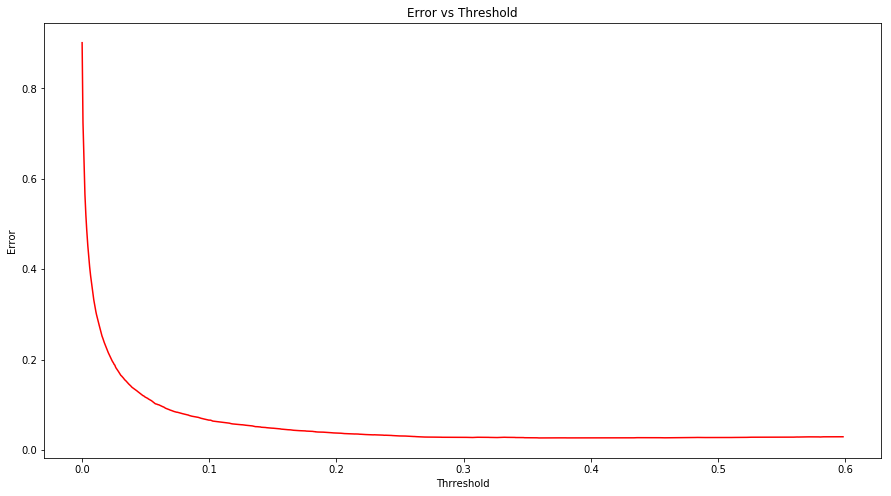

In [104]:
# Error rate with different thresholds
import numpy as np
thresholds = np.random.uniform(0.0,0.6,1000)
error_rate = {}
for t in thresholds:
    prediction = probs > t
    e = (len(prediction) - np.sum(prediction == default['default']))/ len(prediction)
    error_rate[t] = e

lists = sorted(error_rate.items()) 
x, y = zip(*lists)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(x, y, color='r')
ax.set_xlabel('Thrreshold')
ax.set_ylabel('Error')
ax.set_title('Error vs Threshold')

plt.show()

The <b>ROC Curve</b> is a popular graphic to display the two types of errors for all possible thresholds. The overall performance of a classifier, summarized over all possible thresholds, is given by the <b>area under the ROC Curve (AUC).</b> Larger the AUC, better the classifier. Hence an ideal ROC curve will hug the top left corner. ROC curves are useful for comparing different classifiers as they take into account all the possible threshold values. The ROC curve is the plot of <b>True positive rate(sensitivity)</b> vs <b>False positive rate (1-specificity)</b> for the possible values of thresholds. The ROC curve for the default data is shown below.

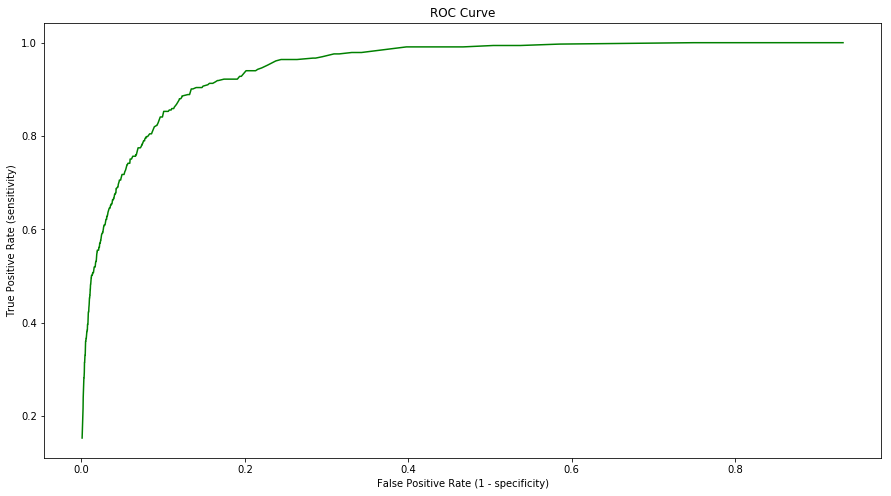

In [105]:
roc = {}
for t in thresholds:
    prediction = probs > t
    tn, fp, fn, tp = confusion_matrix(y_true=default['default'], y_pred=prediction).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    roc[1-specificity] = sensitivity

lists = sorted(roc.items()) 
x, y = zip(*lists)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(x, y, color='g')
ax.set_xlabel('False Positive Rate (1 - specificity)')
ax.set_ylabel('True Positive Rate (sensitivity)')
ax.set_title('ROC Curve')

plt.show()

#### 4.4.4 Quadratic Discriminant Analysis

Like LDA, the <b>Quadratic discriminant analysis (QDA)</b> classifier assumes that the observations from each class are drawn from the Gaussian distribution and plugs estimates into Bayes' theorem to predict. But QDA assumes that <b>each class has its own covariance matrix</b>. The resultant discriminant function is quadratic in $x$.

$$\delta_k(x) = log(\pi_k) - \frac{1}{2}\mu_k^T \Sigma_k^{-1} \mu_k - \frac{1}{2}x^T \Sigma_k^{-1} x + x^T \Sigma_k^{-1} \mu_k$$

LDA is sometimes preferred over QDA as predicting variances of the individual classes is a cumbersome task. LDA is much less flexible classifier and hence has low variance. But the LDA's assumption that all the classes share the same variance, makes LDA carry a high bias. <b>LDA performs better than QDA if there are fewer training samples.</b>

### 4.5 A Comparison of Classification Methods

The logistic regression and LDA methods are closely connected. The only difference between the two models is the fact that the parameters of the logistic regression is estimated using <b>maximum likelihood</b>, while for LDA, parameters are computed using the estimated mean and variance of a Gaussian distribution. LDA assumes that the obesrvations are drawn fron a normal distribution with a common covariance matrix for each class. If this assumption holds true, LDA outperforms logistic regression. Logistic regression can outperform LDA if these assumptions are not true.

<b>KNN</b> is a completely non-parametric approach as it makes no assumption about the shape of the distribution. KNN dominates over LDA and logistic regression when the decision boundary is highly non-linear. One drawback of KNN is the fact that it does not tell about the importance of individual predictors.

<b>QDA</b> assumes a quadratic decision boundary and hence can model a wider range of problems than the linear methods. Not as flexible as KNN, QDA can perfrom better in the presence of a limited number of training observations.

In a nutshell, <b>when the true decision boundary is linear, LDA and logistic regression methods will tend to perform better. When the boundary is moderately non-linear, QDA may give better results. For a much more complicated decision boundaries, a non-parametric approach such as KNN can perform bettre. The level of smootheness for a non-parametric approach needs to be chosen carefully though.</b>  

### 4.7 Exercises
#### Conceptual

Q1. Using a little bit of algebra, prove that the logistic function representation and logit representation
for the logistic regression model are equivalent.

<b>Sol: </b> Logistic function representation is given as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

then $1-p(X) = \frac{1}{1 + e^{\beta_0 + \beta_1X}}$, Taking the ratio of these two and then taking the log, we get

$$log\bigg( \frac{p(X)}{1-p(X)} \bigg) = \beta_0 + \beta_1X$$

Q2. Under the assumption that the observations in the $k$th class is drawn from a normal distribution, the Bayes' classifier assign an observation to the class for which the discriminant function is maximized.

<b>Sol:</b> The posterior probability for the Bayes' classifier is given as:

$$p_k(X) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_k)^2} \bigg)}
{\sum_{l=1}^{k}\pi_l\frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_l)^2} \bigg)}$$

In the Bayes' classifier, we have to find the class for which this is maximum. As log function is monotonically increasing, we can maximize the log of the posterior probability. Here the denominator is constant and hence for the maximization process, this can be ignored. For the constant variance case, the term $\frac{1}{\sqrt{2\pi}\sigma}$ in the neumerator is constant and hence can be ignored as well. Now taking the logarithm and expanding the quadratic term, we get:

$$log(p_k(X)) = \delta_k(X) = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + x.\frac{\mu_k}{\sigma^2} - \frac{x^2}{2\sigma^2}$$

The last term is constant in $k$ as well and hence can be ignored, which gives:

$$\delta_k(X) = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + x.\frac{\mu_k}{\sigma^2}$$

Q3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a classspecific mean vector and a class specific covariance matrix. We can not assume that the variance of each class is same. Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact
quadratic.

<b>Sol:</b> Replacing $\sigma$ with $\sigma_k$ in the second equation in question 2 and not ignoring the term $\frac{1}{\sqrt{2\pi}\sigma_k}$ in the neumerator before taking the log, we get the <b>discriminant function</b> as:

$$\delta_k(X) = log(\pi_k) - log(\sigma_k) - \frac{\mu_k^2}{2\sigma_k^2} + x.\frac{\mu_k}{\sigma_k^2} - \frac{x^2}{2\sigma_k^2}$$

And hence Bayes' classifier is not linear in $x$. In fact, it is quadratic.

Q4. When the number of features p is large, there tends to be a deterioration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the <b>curse of dimensionality</b>, and it ties into the fact that parametric approaches often perform poorly when p is large.

(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make
the prediction?

<b>Sol:</b> As for each test observation, we use the observations in the range <b>0.1</b> (half left and half right) of the entire range of observation, and hence this accounts to the average value of <b>10%</b> of the available observation. 

To be more specific, for the test observation, x < 0.05, we will use the observations in the range [0, x+0.05] and for x > 0.95, we will use the observations in the range [x-0.05, 1]. As the observations are uniformly distributed, we can find the average fraction of observations used by integrating the individual ranges:

$$fraction = \int_{0}^{0.05}(100x+5) dx + \int_{0.05}^{0.95} 10 dx + \int_{0.95}^{1} (105-100x)dx = 9.75$$

And hence to be more specific, we use <b>9.75%</b> of the observations.

(b) Solve the above case for 2 predictors $X_1$ and $X_2$.

<b>Sol:</b> For the two independent predictors, the fraction of observations used will be 9.75% for $X_1$ and 9.75% for $X_2$. Hence the total fraction of observations used is 9.75% $\times$ 9.75% = 0.95%.

(c) Now suppose that we have a set of observations on p = 100 features. What fraction of the available observations will we use to make the prediction?

<b>Sol:</b> For p=100, we will use (9.75%)$^{100}$ = 0% of the total observations for the prediction.

(e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For p = 1, 2, and 100, what is the length of each side of the hypercube? Comment on your answer.

<b>Sol:</b> For $p=l$, the length of the hypercube is $(0.1)^{\frac{1}{l}}$. Hence, as $l$ increases, the lenghth of the cube increases.

Q5. (a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

<b>Sol:</b> QDA may perform better on training set as it has higher flexibility. It may try to imitate training data as close as possible and hence may result in overfitting. LDA will perform better on test set.

(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

<b>Sol:</b> QDA will perform better both on the training as well as test sets.

(c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

<b>Sol:</b> As in QDA, we assume different variance among classes. If sample size is small, QDA performs better. As sample size increases, the assumption of equal variance among classes (as assumed while doing LDA) may be true and hence the performance of LDA and QDA in this case solely depends on the Bayes' decision boundary.

(d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary.

<b>Sol:</b> False

Q6. Suppose we collect data for a group of students in a statistics class with variables X1 =hours studied, X2 =undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, $\widehat{\beta_0}= −6$ , $\widehat{\beta_1} = 0.05$, $\widehat{\beta_2}= 1$.

(a) Estimate the probability that a student who studies for 40h and has an undergrad GPA of 3.5 gets an A in the class.

<b>Sol:</b> The probability in logistic regression is given as:

$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + ... + \beta_pX_p}}$$

Hence, the probability of a student getting A with the given data is

$$p = \frac{e^{-6 + 0.05\times40 + 1\times 3.5}}{1 + e^{-6 + 0.05\times40 + 1\times 3.5}} = 0.3775$$

(b) How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

<b>Sol:</b> Here probability is 0.5. Hence,

$$e^{-6 + 0.05\times h + 1\times 3.5} = \frac{p}{1-p} = 1$$

$$-2.5 + 0.05\times h = 0$$

and hence value of h is <b>50</b>.

Q7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit.We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X}$ = 10, while the mean for those that didn’t was $\bar{X}$ = 0. In addition, the
variance of X for these two sets of companies was $\widehat{\sigma^2}$ = 36. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

<b>Sol:</b> From Bayes' theorem:

$$p_k(X) = \frac{\pi_k \frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_k)^2} \bigg)}
{\sum_{l=1}^{k}\pi_l\frac{1}{\sqrt{2\pi}\sigma} exp \bigg( {-\frac{1}{2\sigma^2}(x - \mu_l)^2} \bigg)}$$

Here, $\pi_{YES} = 0.8, \pi_{NO} = 0.2, \mu_{YES} = 10, \mu_{N0} = 0, \widehat{\sigma^2} = 36 $. Hence, $f_{YES}(4) = 0.04033, \ f_{NO}(4) = 0.05324$. Which gives the probability as:

$$p_YES{4} = \frac{0.8 \times 0.04033}{0.8 \times 0.04033 + 0.2 \times 0.05324} = 0.75186$$

Q8. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

<b>Sol:</b> For KNN with K=1, the training errro rate is 0 as all the training data will be classified correctly. Hence for the KNN with average error rate of 18%, the test error rate is 36% which makes the logistic regression with test error rate 30% is better for classification.

Q9. This problem has to do with odds.

(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

<b>Sol:</b> Odds is given as:

$$\frac{p}{1-p} = 0.37$$

which gives the probability as <b>0.27</b>.

(b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

<b>Sol:</b> Here, p = 0.16. Hence odds of defaulting is

$$odds = \frac{p}{1-p} = \frac{0.16}{1-0.16} = 0.19$$

#### Applied

Q10. This question should be answered using the Weekly data set.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


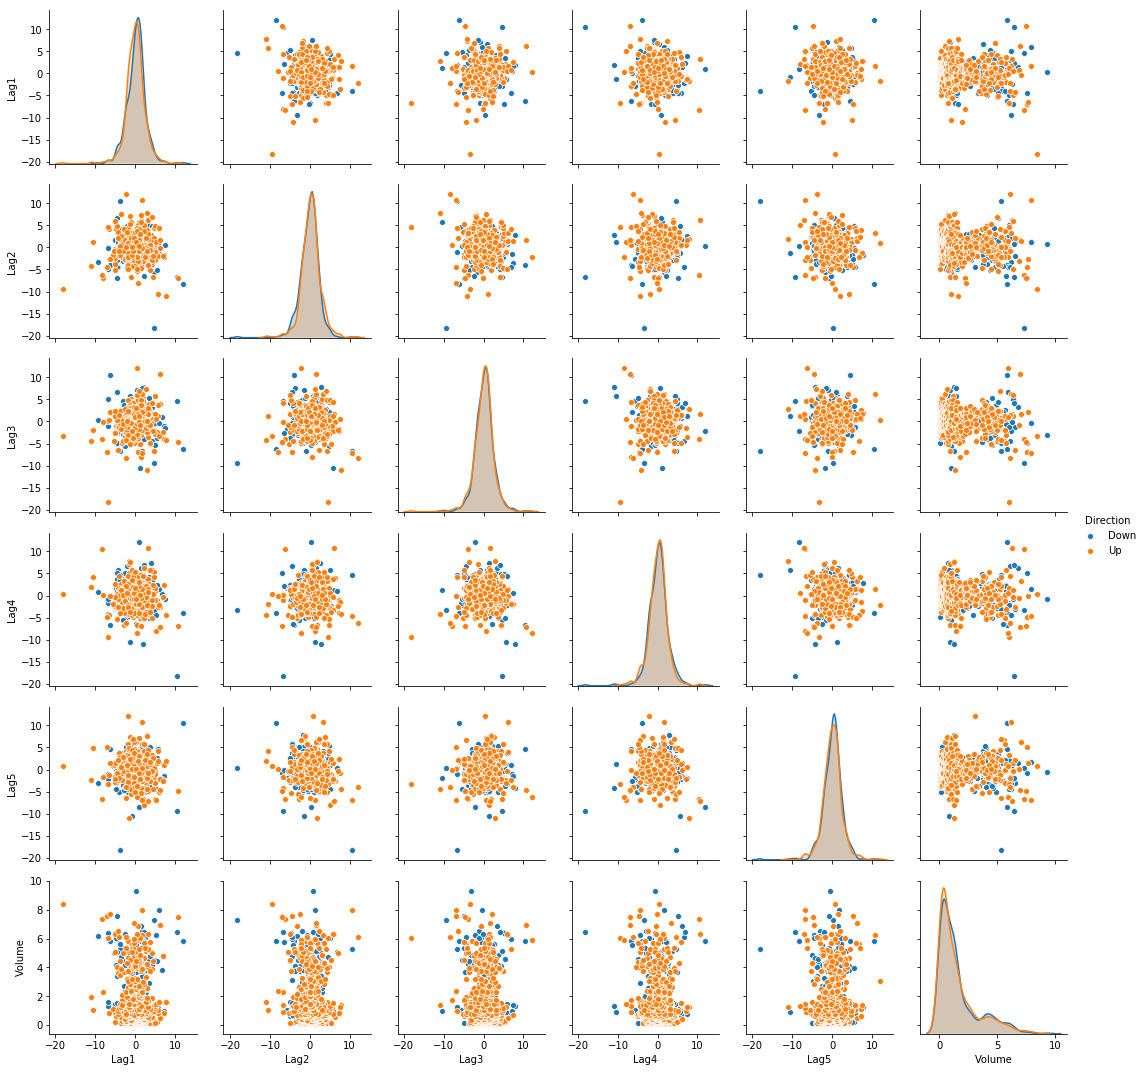

In [107]:
import seaborn as sns
weekly = pd.read_csv("data/Weekly.csv")

sns.pairplot(weekly, vars=['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume'], hue='Direction')

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

<b>Sol:</b> Significant predictors are: <b>Lag2</b>

In [112]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit

weekly['trend'] = weekly['Direction'].map({'Down': 0, 'Up': 1})
X = weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X, prepend=True)
y = weekly['trend']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:                0.006580
Time:                        19:13:02   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

<b>Sol:</b> The confusion matrix is shown below. The overall fraction of correct predictions is <b>56.11%</b>. The model has higher <b>flase positive</b> rate. 

In [165]:
print("\t\t Confusion Matrix")
print("\t Down  Up(Predicted)")
print("Down \t" + str(result.pred_table(threshold=0.5)[0]))
print("Up \t" + str(result.pred_table(threshold=0.5)[1]))

		 Confusion Matrix
	 Down  Up(Predicted)
Down 	[ 23. 418.]
Up 	[ 20. 524.]


(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

<b>Sol:</b> The confusion matrix is shown below. The overall fraction of correct predictions is <b>62.5%</b>.

In [166]:
train = weekly.loc[weekly['Year'] <= 2008]
test = weekly.loc[weekly['Year'] >= 2009]

X = train[['Lag2']]
X = sm.add_constant(X, prepend=True)
y = train['trend']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 10 Sep 2018   Pseudo R-squ.:                0.003076
Time:                        19:53:30   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [167]:
from sklearn.metrics import confusion_matrix

X_test = test[['Lag2']]
X_test = sm.add_constant(X_test, prepend=True)
y_test = test['trend']
predictions = result.predict(X_test) > 0.5

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_test, predictions)[0]))
print("Up \t" + str(confusion_matrix(y_test, predictions)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[ 9 34]
Up 	[ 5 56]


(e) Repeat (d) using LDA.

<b>Sol:</b> The confusion matrix is shown below. The overall fraction of correct predictions is <b>62.5%</b>.

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

clf = LinearDiscriminantAnalysis()
clf.fit(train[['Lag2']], train['trend'])
y_predict = clf.predict(test[['Lag2']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[ 9 34]
Up 	[ 5 56]


(f) Repeat (d) using QDA.

<b>Sol:</b> The confusion matrix is shown below. The overall fraction of correct predictions is <b>58.65%</b>. The model always predict that the market will go up.

In [169]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
clf.fit(train[['Lag2']], train['trend'])
y_predict = clf.predict(test[['Lag2']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[ 0 43]
Up 	[ 0 61]


(g) Repeat (d) using KNN with K = 1.

<b>Sol:</b> The confusion matrix is shown below. The overall fraction of correct predictions is <b>49.04%</b>.

In [172]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train[['Lag2']], train['trend'])
y_predict = neigh.predict(test[['Lag2']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['trend'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[21 22]
Up 	[31 30]


(h) Which of these methods appears to provide the best results on this data?

<b>Sol:</b> The logistic regression and LDA have the minimum error rate.

Q11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [180]:
auto = pd.read_csv("data/Auto.csv")
auto.dropna(inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median.

In [181]:
auto['mpg01'] = np.where(auto['mpg']>=auto['mpg'].median(), 1, 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

<b>Sol:</b> The scatterplot of the data is shown below. As mpg01 with value 1 is shown with orange and value 0 is shown with blue, it is evident that certain combinations of predictors are present which can be used to model a classifier with high accuracy. For example, if we take a look at the scatter plot of weight and accelaration, it can be noted that the observations are decently segregated based on class.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


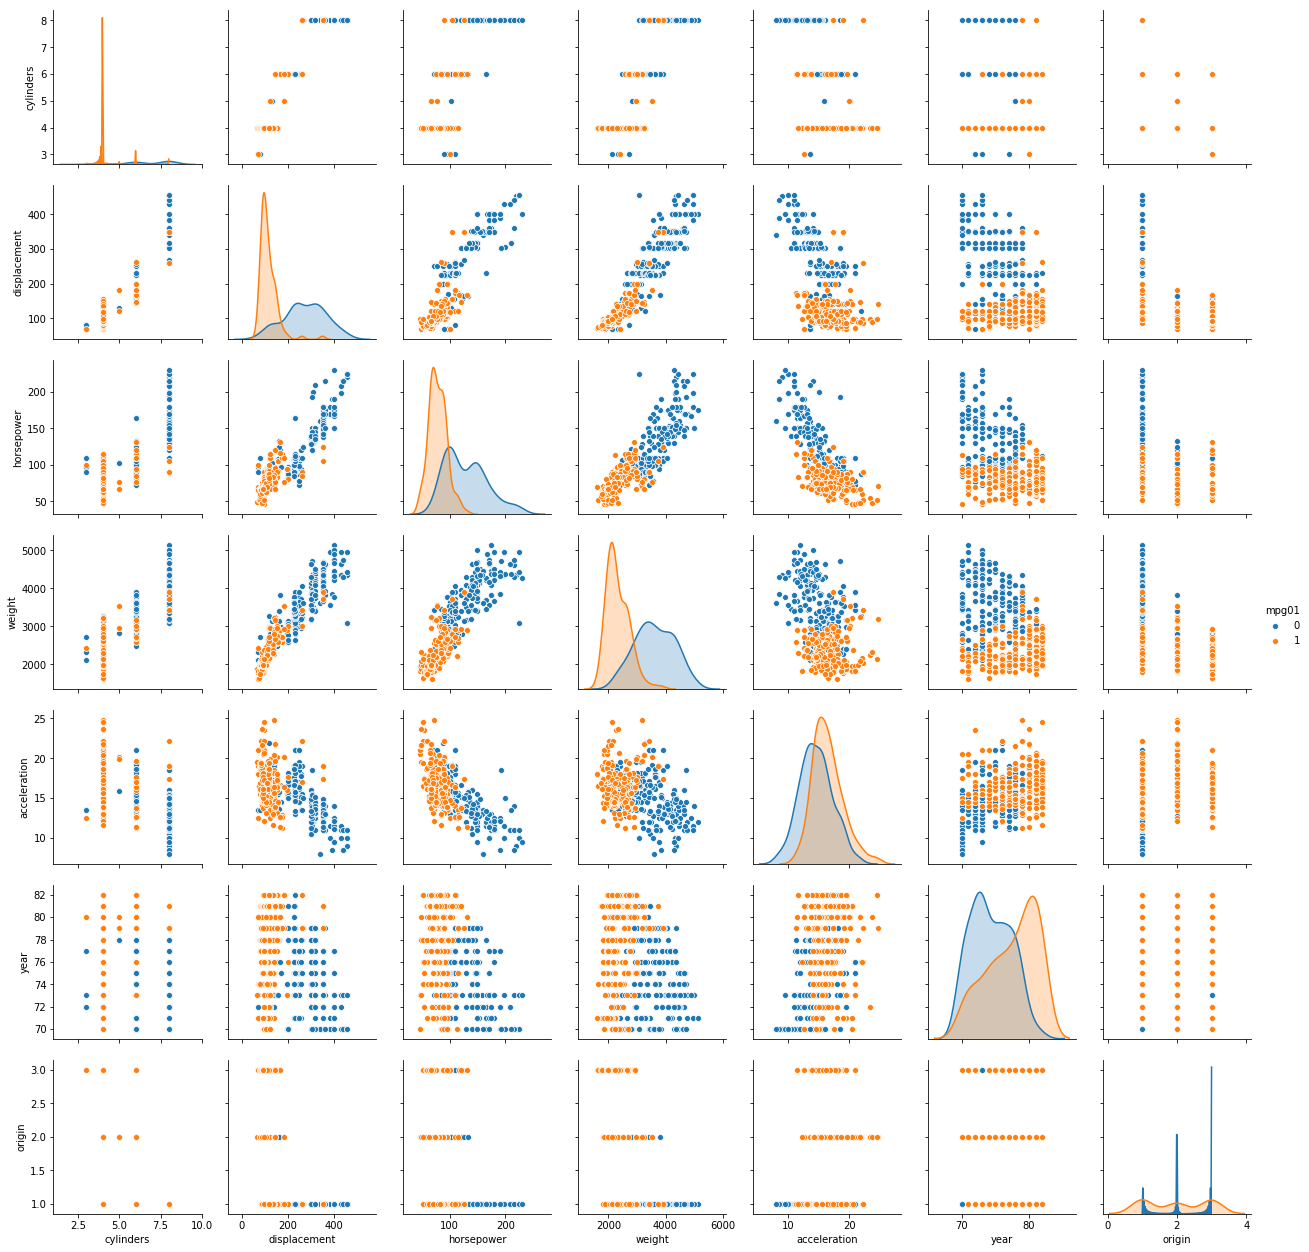

In [185]:
sns.pairplot(auto, vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
                         'year', 'origin'], hue='mpg01')

(c) Split the data into a training set and a test set.

In [196]:
msk = np.random.rand(len(auto)) < 0.8
train = auto[msk]
test = auto[~msk]
print("Length of training data: " +str(len(train)))
print("Length of test data: " +str(len(test)))

Length of training data: 311
Length of test data: 81


(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

<b>Sol:</b> The test prediction accuracy for the model is <b>96.30%</b>.

In [198]:
clf = LinearDiscriminantAnalysis()
clf.fit(train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']], train['mpg01'])
y_predict = clf.predict(test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[32  3]
Up 	[ 0 46]


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

<b>Sol:</b> The test prediction accuracy for the model is <b>97.53%</b>.

In [200]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']], train['mpg01'])
y_predict = clf.predict(test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 1 45]


(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

<b>Sol:</b> The test prediction accuracy for the model is <b>96.30%</b>.

In [202]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']], train['mpg01'])
y_predict = clf.predict(test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 2 44]


(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

<b>Sol:</b> The test prediction accuracy for the model is <b>96.30%</b>. The optimal value of K is 20. On further increasing the value, no improvement is achieved.

In [208]:
K_values = [1, 2, 4, 8, 15, 20, 30, 50, 100]
for k in K_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']], train['mpg01'])
    y_predict = neigh.predict(test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']])

    print("\t\t Confusion Matrix for K = " +str(k))
    print("\t Down Up(Predicted)")
    print("Down \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[0]))
    print("Up \t" + str(confusion_matrix(y_true=test['mpg01'], y_pred=y_predict)[1]))

		 Confusion Matrix for K = 1
	 Down Up(Predicted)
Down 	[33  2]
Up 	[ 5 41]
		 Confusion Matrix for K = 2
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 6 40]
		 Confusion Matrix for K = 4
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 6 40]
		 Confusion Matrix for K = 8
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 2 44]
		 Confusion Matrix for K = 15
	 Down Up(Predicted)
Down 	[33  2]
Up 	[ 2 44]
		 Confusion Matrix for K = 20
	 Down Up(Predicted)
Down 	[33  2]
Up 	[ 1 45]
		 Confusion Matrix for K = 30
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 2 44]
		 Confusion Matrix for K = 50
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 2 44]
		 Confusion Matrix for K = 100
	 Down Up(Predicted)
Down 	[34  1]
Up 	[ 2 44]


Q13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

<b>Sol:</b> From the scatterplot it is identified that the predictors that can be used to model the classifier are: 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv'. 

The test prediction accuracy for <b>logistic regression is 81.48%</b>. The test prediction accuracy for <b>LDA is 81.48%</b>. The test prediction accuracy for <b>LDA is 77.78%</b>. The test prediction accuracy for <b>KNN with different values of K is 77.78%</b>.

In [218]:
boston = pd.read_csv("data/Boston.csv")
boston['crime01'] = np.where(boston['crim']>=boston['crim'].median(), 1, 0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crime01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


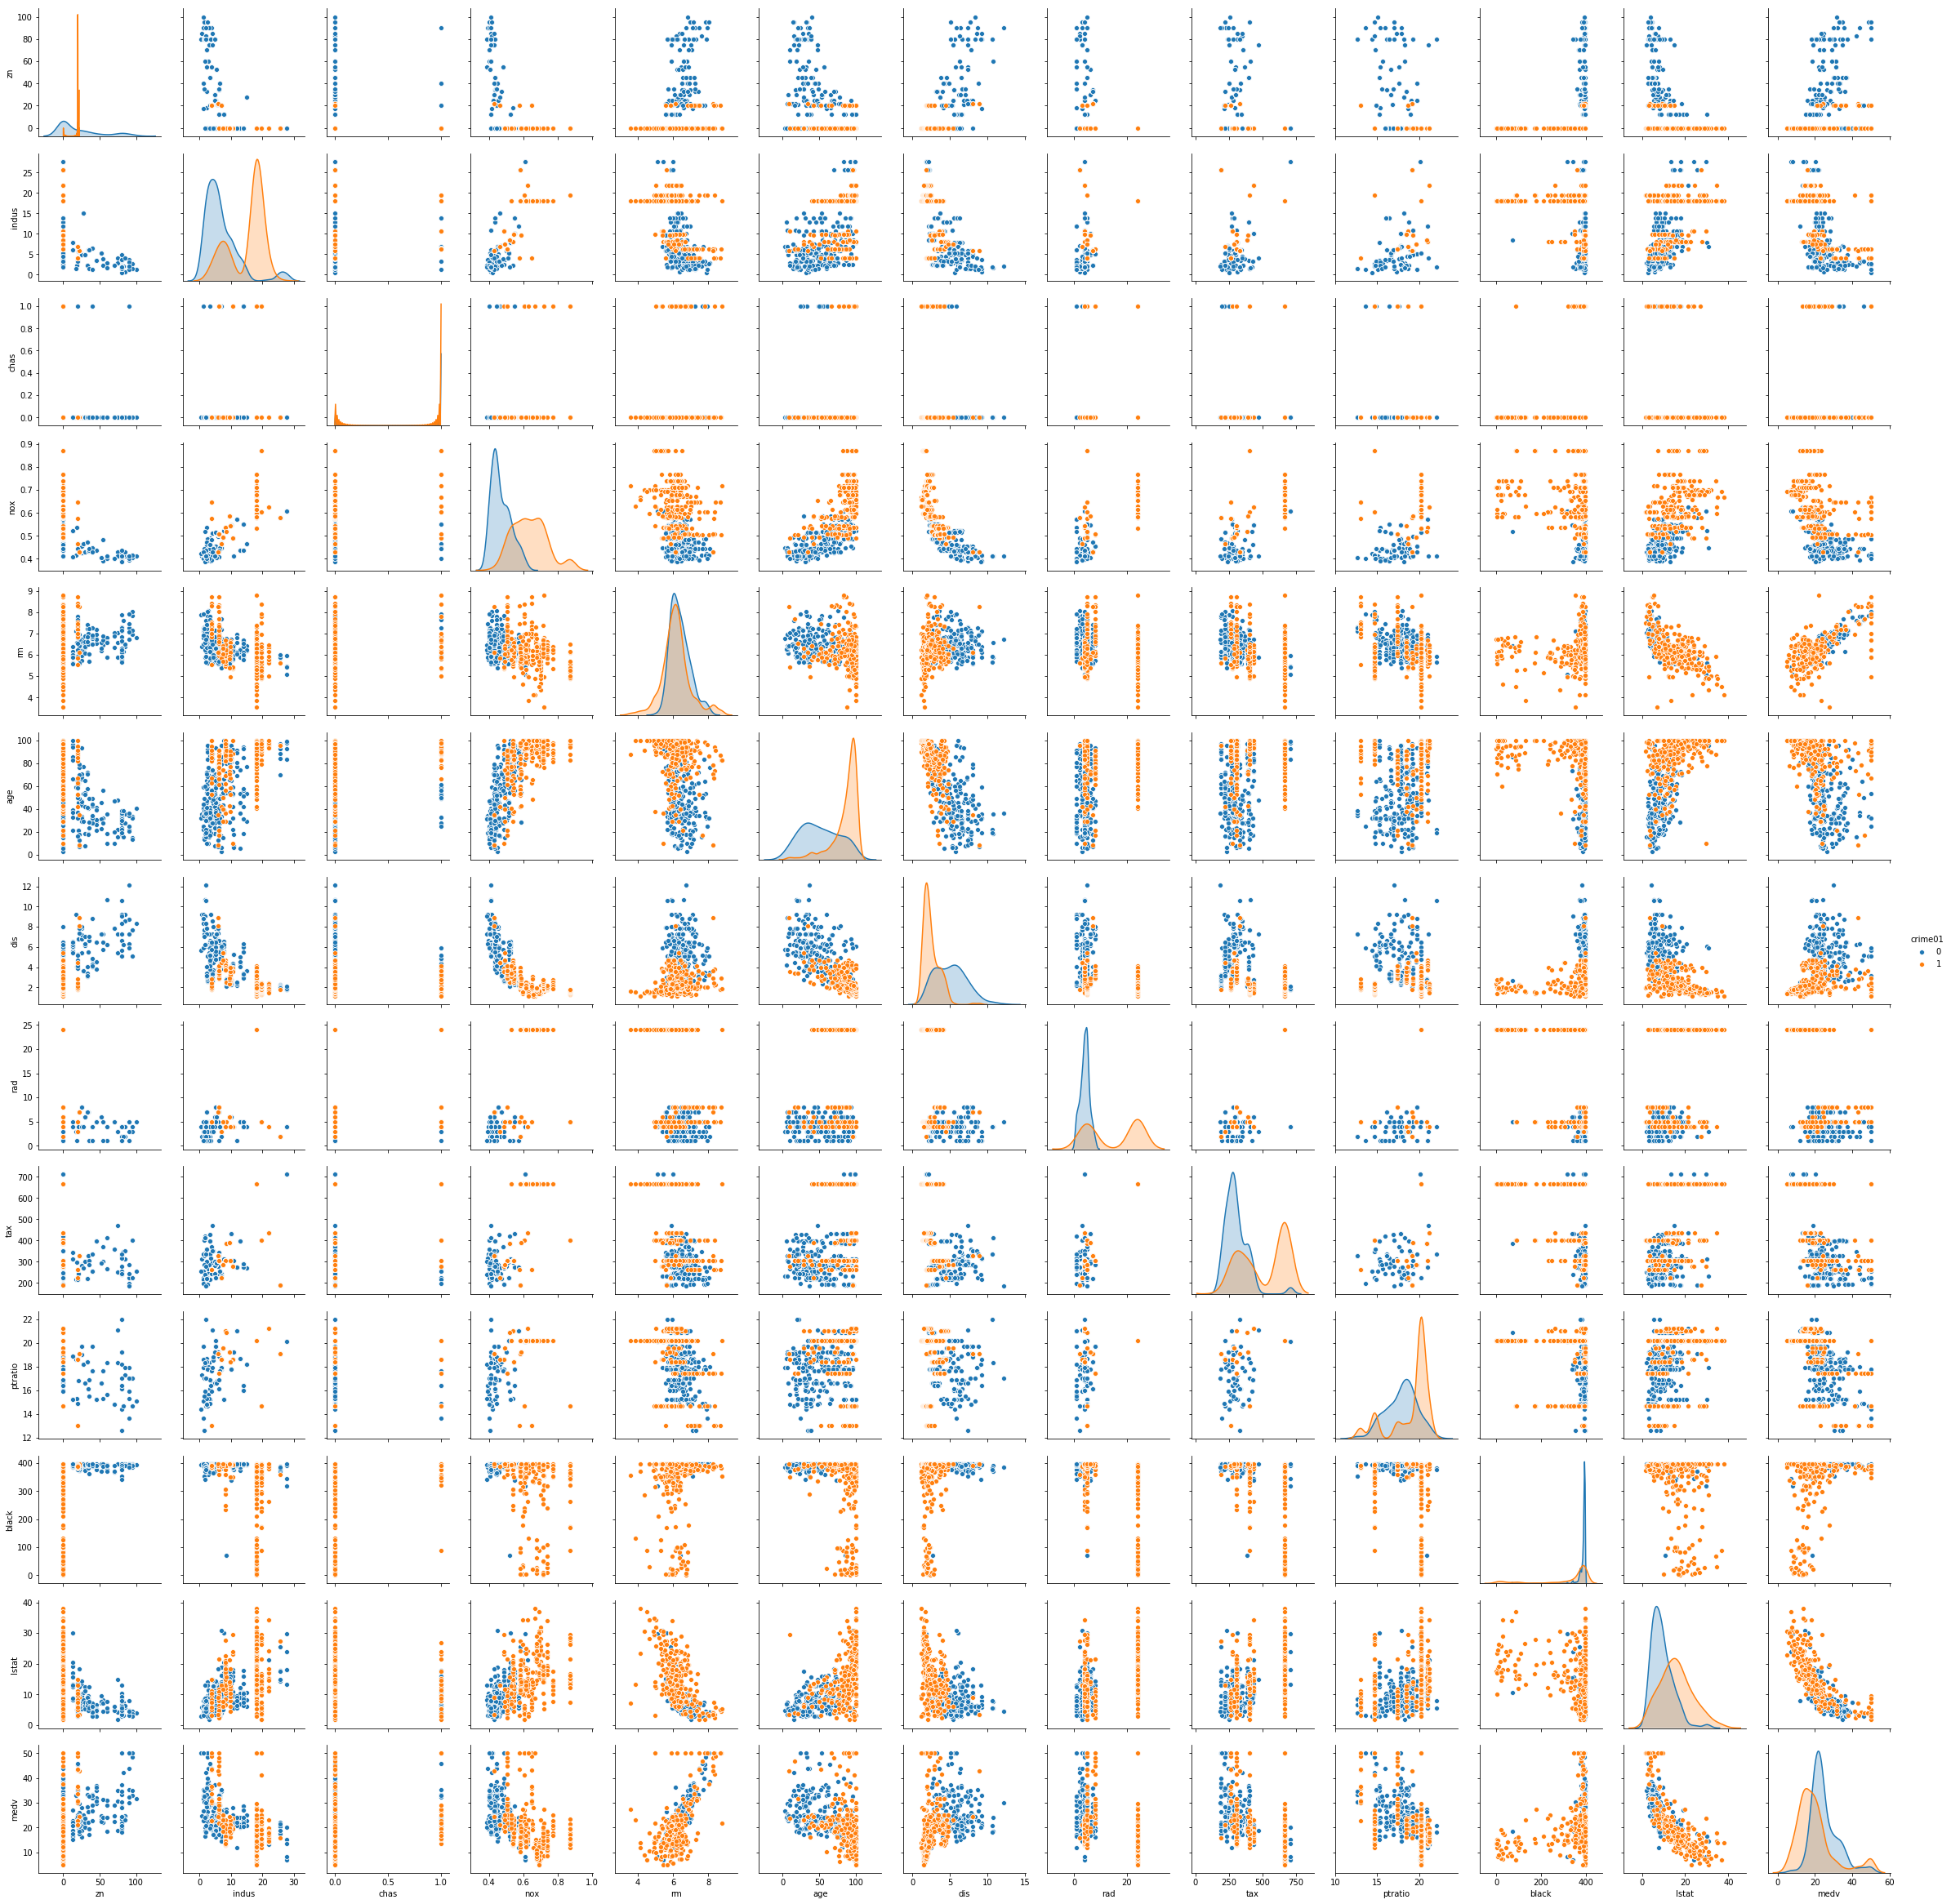

In [219]:
sns.pairplot(boston, vars=['zn', 'indus', 'chas', 'nox', 'rm', 
                         'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'], hue='crime01')

In [221]:
msk = np.random.rand(len(boston)) < 0.8
train = boston[msk]
test = boston[~msk]
print("Length of training data: " +str(len(train)))
print("Length of test data: " +str(len(test)))

Length of training data: 398
Length of test data: 108


In [222]:
clf = LogisticRegression()
clf.fit(train[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']], train['crime01'])
y_predict = clf.predict(test[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[40  6]
Up 	[14 48]


In [223]:
clf = LinearDiscriminantAnalysis()
clf.fit(train[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']], train['crime01'])
y_predict = clf.predict(test[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[43  3]
Up 	[17 45]


In [224]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(train[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']], train['crime01'])
y_predict = clf.predict(test[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']])

print("\t\t Confusion Matrix")
print("\t Down Up(Predicted)")
print("Down \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[0]))
print("Up \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[1]))

		 Confusion Matrix
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]


In [229]:
K_values = [1, 2, 4, 8, 15, 20, 30, 50, 100]
for k in K_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']], train['crime01'])
    y_predict = clf.predict(test[['zn', 'chas', 'nox', 'rm', 'age', 'dis', 'black', 'lstat', 'medv']])

    print("\t\t Confusion Matrix for K = " +str(k))
    print("\t Down Up(Predicted)")
    print("Down \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[0]))
    print("Up \t" + str(confusion_matrix(y_true=test['crime01'], y_pred=y_predict)[1]))

		 Confusion Matrix for K = 1
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 2
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 4
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 8
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 15
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 20
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 30
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 50
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
		 Confusion Matrix for K = 100
	 Down Up(Predicted)
Down 	[40  6]
Up 	[18 44]
